#In-built K Means Methods

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [2]:
# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print("\n\nThe Size of The Training Dataset : ",train_df.shape)
print("\nThe Size of The Training Dataset : ",test_df.shape)
print(train_df)
print("The Missing Values in The Training Dataset\n\n",train_df.isnull().sum())
print("The Missing Values in The Testing Dataset\n\n",test_df.isnull().sum())
print(train_df.columns)
x=train_df.drop(columns={"Activity"})
y=train_df["Activity"]
# Load the data
train_df = pd.read_csv('train.csv')



The Size of The Training Dataset :  (7352, 563)

The Size of The Training Dataset :  (2947, 563)
      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.995279         -0.983111

In [3]:
# Perform feature selection and prepare the dataset
x = train_df.drop(columns=["Activity"])
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Initialize lists to store results
k_values = list(range(2, 11))
elbow_scores = []
silhouette_scores = []
davies_bouldin_scores = []

Finding optimal k value using Elbow method and Silhouette Score

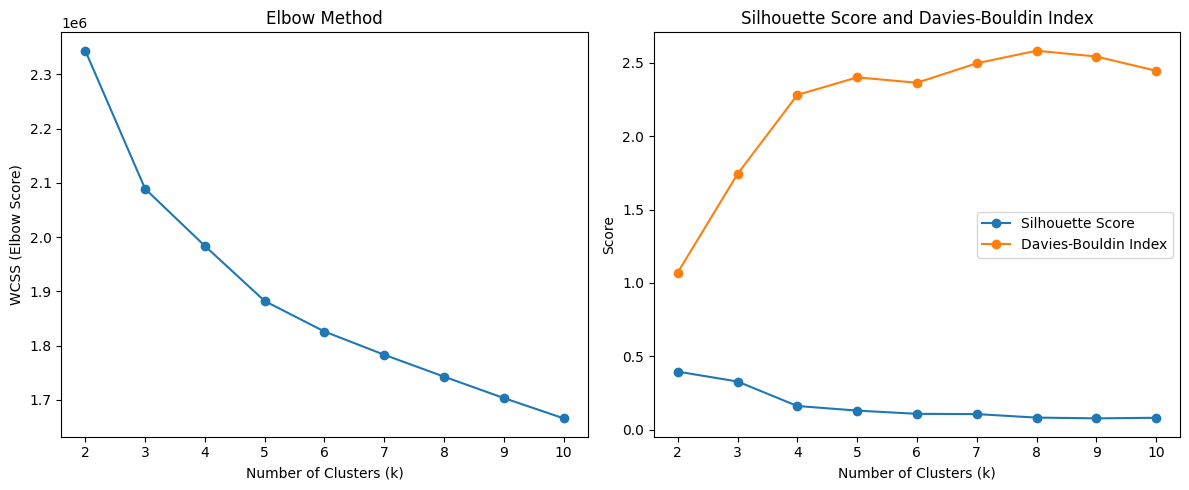

In [4]:
# Elbow Method
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(x_scaled)
    elbow_scores.append(kmeans.inertia_)

# Silhouette Score and Davies-Bouldin Index
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(x_scaled)
    silhouette_scores.append(silhouette_score(x_scaled, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(x_scaled, kmeans.labels_))

# Plotting the results
plt.figure(figsize=(12, 5))

# Elbow Method Plot
plt.subplot(1, 2, 1)
plt.plot(k_values, elbow_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Elbow Score)')
plt.title('Elbow Method')

# Silhouette Score and Davies-Bouldin Index Plot
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.plot(k_values, davies_bouldin_scores, marker='o', label='Davies-Bouldin Index')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('Silhouette Score and Davies-Bouldin Index')
plt.legend()

plt.tight_layout()
plt.show()

Selected feature names : 

Index(['tGravityAcc-mean()-X', 'tGravityAcc-max()-X', 'tGravityAcc-min()-X',
       'fBodyAccJerk-entropy()-X', 'fBodyAccJerk-entropy()-Y'],
      dtype='object')

After Feature Selection The Shape of The Training Dataset :  (7352, 5)
After Feature Selection The Shape of The Testing Dataset  :  (2947, 5)
Silhouette Score ( Training dataset )   : 0.8270090285139965
Silhouette Score ( Testing dataset  )   : 0.830854104944898


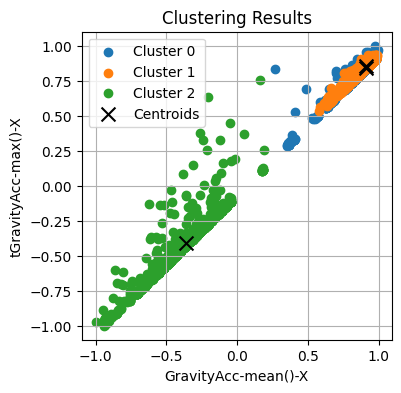

Selected feature names : 

Index(['tBodyAcc-std()-X', 'tBodyAcc-sma()', 'tGravityAcc-std()-X',
       'tBodyGyroJerk-std()-Z', 'tBodyGyroJerk-energy()-Z', 'fBodyAcc-std()-X',
       'fBodyGyro-bandsEnergy()-9,16.2', 'fBodyGyro-bandsEnergy()-17,32.2'],
      dtype='object')
Silhouette Score ( Training dataset )   : 0.7140380577893611
Silhouette Score ( Testing dataset  )   : 0.7355803254687656


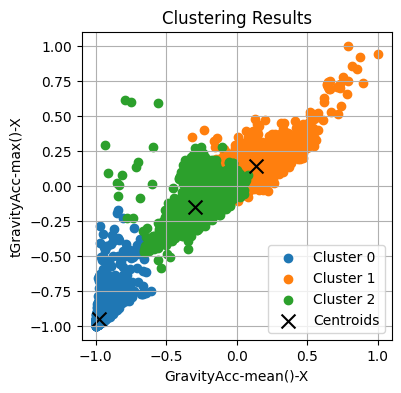

Selected feature names:
['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y']
Silhouette Score ( Training dataset )   : 0.6488163273987867
Silhouette Score ( Testing dataset  )   : 0.6478744052260157


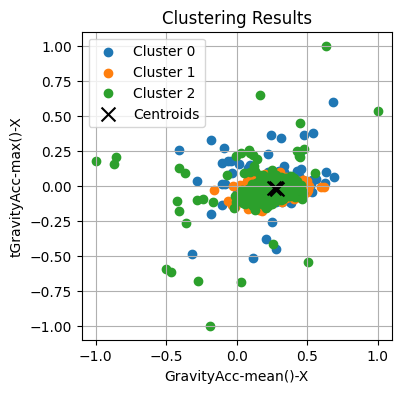

In [5]:
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(x, y)
np.set_printoptions(precision=10)

features = fit.transform(x)

selected_indices = fit.get_support(indices=True)

selected_feature_names = x.columns[selected_indices]

print("Selected feature names : \n")
print(selected_feature_names)
train_df1 = train_df[selected_feature_names].copy()
test_df1 = test_df[selected_feature_names].copy()
print("\nAfter Feature Selection The Shape of The Training Dataset : ",train_df1.shape)
print("After Feature Selection The Shape of The Testing Dataset  : ",test_df1.shape)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
kmeans.fit(train_df1)
train_clusters = kmeans.predict(train_df1)
test_clusters = kmeans.predict(test_df1)
cluster_centroids = kmeans.cluster_centers_
silhouette_avg11 = silhouette_score(train_df1, train_clusters)
silhouette_avg12 = silhouette_score(test_df1, test_clusters)
print(f"Silhouette Score ( Training dataset )   : {silhouette_avg11}")
print(f"Silhouette Score ( Testing dataset  )   : {silhouette_avg12}")
plt.figure(figsize=(4, 4))

for cluster in range(n_clusters):
    cluster_data = train_df1[train_clusters == cluster]

    plt.scatter(cluster_data['tGravityAcc-mean()-X'], cluster_data['tGravityAcc-max()-X'], label=f'Cluster {cluster}')

plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], marker='x', color='black', s=100, label='Centroids')

plt.title('Clustering Results')
plt.xlabel('GravityAcc-mean()-X')
plt.ylabel('tGravityAcc-max()-X')
plt.legend()
plt.grid(True)
plt.show()

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

ridge = Ridge(alpha=1.0)
select_from_model = SelectFromModel(ridge, max_features=8)
select_from_model.fit(x, y_encoded)
features_selected = select_from_model.transform(x)
selected_indices = select_from_model.get_support(indices=True)
selected_feature_names = x.columns[selected_indices]
print("Selected feature names : \n")
print(selected_feature_names)
train_df2 = train_df[selected_feature_names].copy()
test_df2 = test_df[selected_feature_names].copy()
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
kmeans.fit(train_df2)
train_clusters = kmeans.predict(train_df2)
test_clusters = kmeans.predict(test_df2)
cluster_centroids = kmeans.cluster_centers_
silhouette_avg21 = silhouette_score(train_df2, train_clusters)
silhouette_avg22 = silhouette_score(test_df2, test_clusters)
print(f"Silhouette Score ( Training dataset )   : {silhouette_avg21}")
print(f"Silhouette Score ( Testing dataset  )   : {silhouette_avg22}")
plt.figure(figsize=(4, 4))

for cluster in range(n_clusters):
    cluster_data = train_df2[train_clusters == cluster]

    plt.scatter(cluster_data['tBodyAcc-std()-X'], cluster_data['tBodyAcc-sma()'], label=f'Cluster {cluster}')

plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], marker='x', color='black', s=100, label='Centroids')

plt.title('Clustering Results')
plt.xlabel('GravityAcc-mean()-X')
plt.ylabel('tGravityAcc-max()-X')
plt.legend()
plt.grid(True)
plt.show()
pca = PCA(n_components=11)

pca.fit(x)

selected_feature_indices = pca.components_

selected_feature_names = [x.columns[i] for i in range(len(selected_feature_indices))]

print("Selected feature names:")
print(selected_feature_names)
train_df3 = train_df[selected_feature_names].copy()
test_df3 = test_df[selected_feature_names].copy()
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
kmeans.fit(train_df3)
train_clusters = kmeans.predict(train_df3)
test_clusters = kmeans.predict(test_df3)
cluster_centroids = kmeans.cluster_centers_
silhouette_avg31 = silhouette_score(train_df3, train_clusters)
silhouette_avg32 = silhouette_score(test_df3, test_clusters)
print(f"Silhouette Score ( Training dataset )   : {silhouette_avg31}")
print(f"Silhouette Score ( Testing dataset  )   : {silhouette_avg32}")
plt.figure(figsize=(4, 4))

for cluster in range(n_clusters):
    cluster_data = train_df3[train_clusters == cluster]

    plt.scatter(cluster_data['tBodyAcc-mean()-X'], cluster_data['tBodyAcc-mean()-Y'], label=f'Cluster {cluster}')

plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], marker='x', color='black', s=100, label='Centroids')

plt.title('Clustering Results')
plt.xlabel('GravityAcc-mean()-X')
plt.ylabel('tGravityAcc-max()-X')
plt.legend()
plt.grid(True)
plt.show()

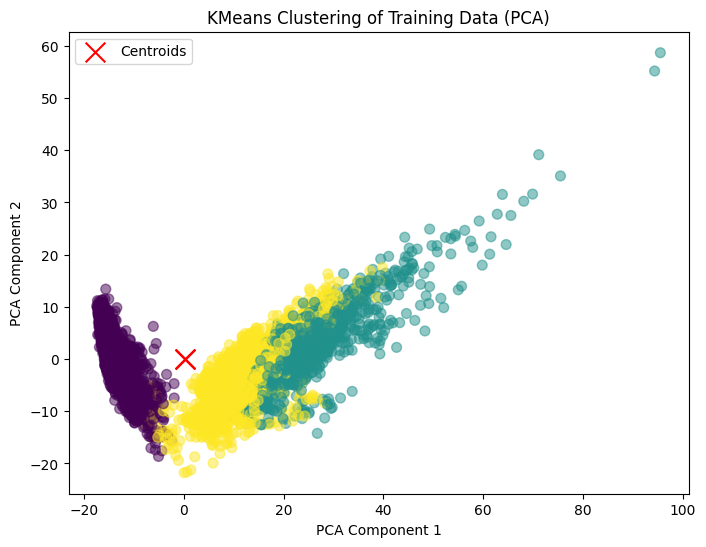

In [6]:
pca = PCA(n_components=2)
train_pca = pca.fit_transform(x_scaled)

# Scatter Plot for Training Data
plt.figure(figsize=(8, 6))
plt.scatter(train_pca[:, 0], train_pca[:, 1], c=train_clusters, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering of Training Data (PCA)')
plt.legend()
plt.show()

#User-defined K Means Methods

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def assign_clusters(X, centroids):
    clusters = np.zeros(len(X))
    for i in range(len(X)):
        distances = [euclidean_distance(X[i], centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters[i] = cluster
    return clusters

def update_centroids(X, clusters, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        cluster_points = X[clusters == i]
        centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

def k_means(X, k, max_iters, plot_steps=False):
    centroids = X[np.random.choice(len(X), k, replace=False)]
    if plot_steps:
        plt.figure(figsize=(10, 6))
        plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', label='Initial Centroids')
        plt.title('Initial Centroids')
        plt.legend()
        plt.show()

    for iter in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        if plot_steps:
            plt.figure(figsize=(10, 6))
            plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', alpha=0.5)
            plt.scatter(new_centroids[:, 0], new_centroids[:, 1], marker='x', color='red', label='Updated Centroids')
            plt.title(f'Iteration {iter + 1}')
            plt.legend()
            plt.show()

        if np.array_equal(new_centroids, centroids):
            break
        centroids = new_centroids

    return clusters, centroids

def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)



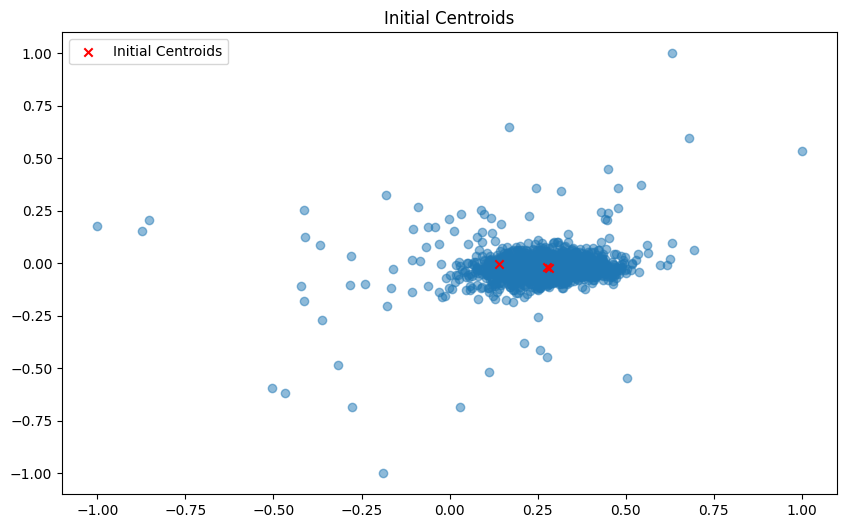

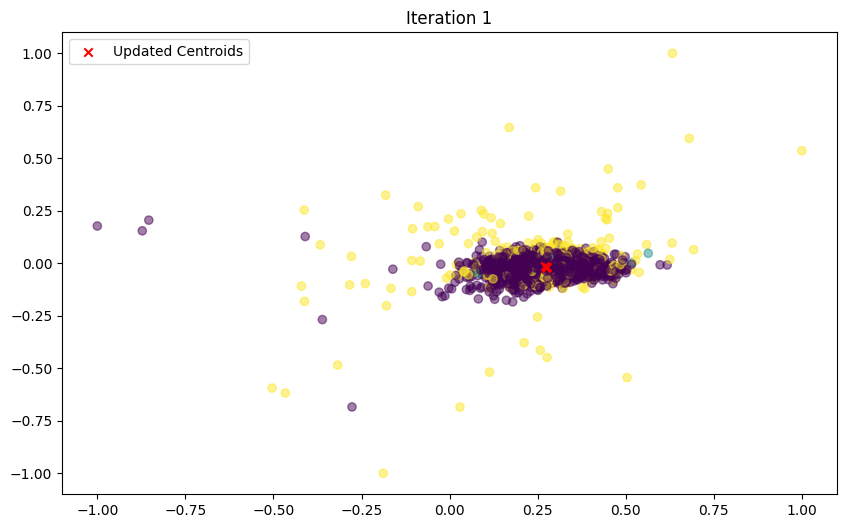

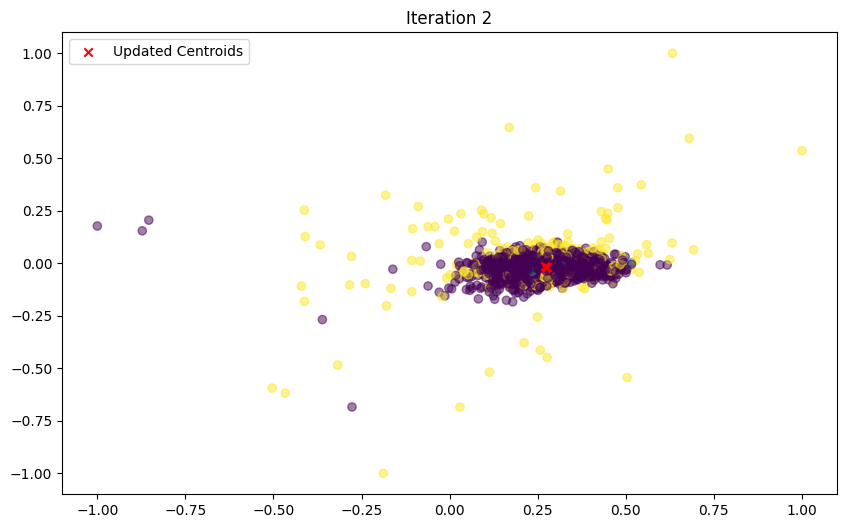

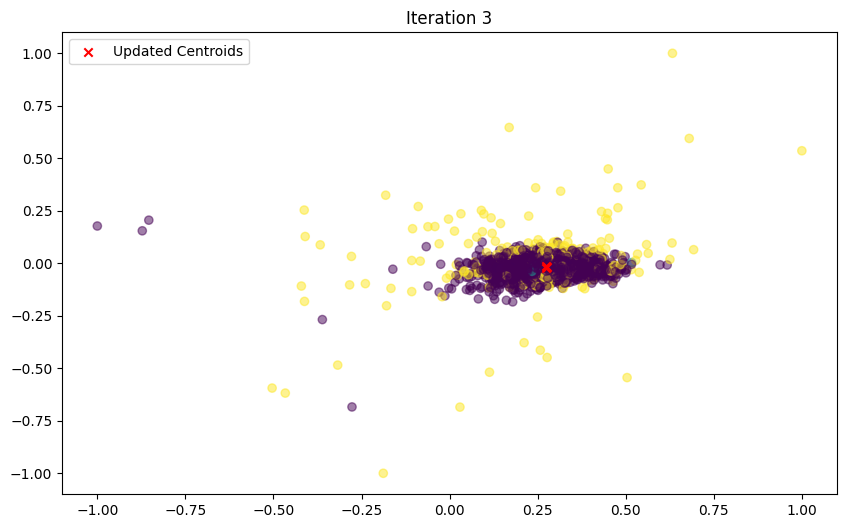

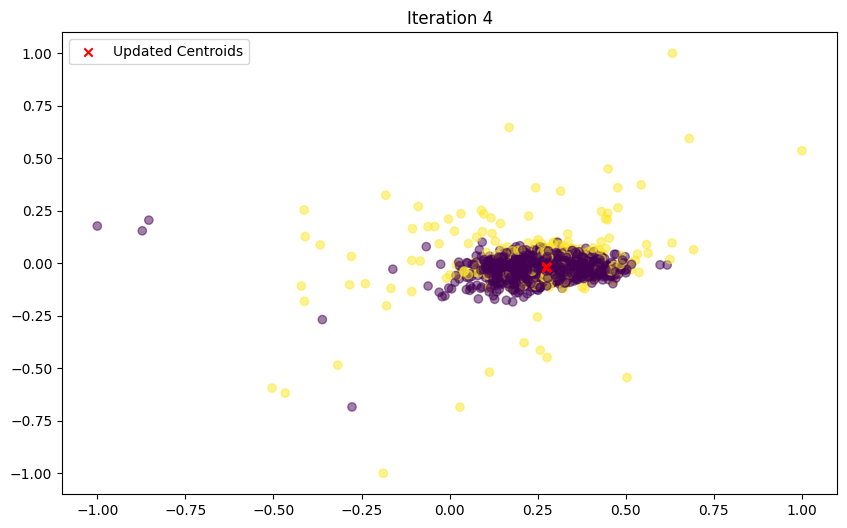

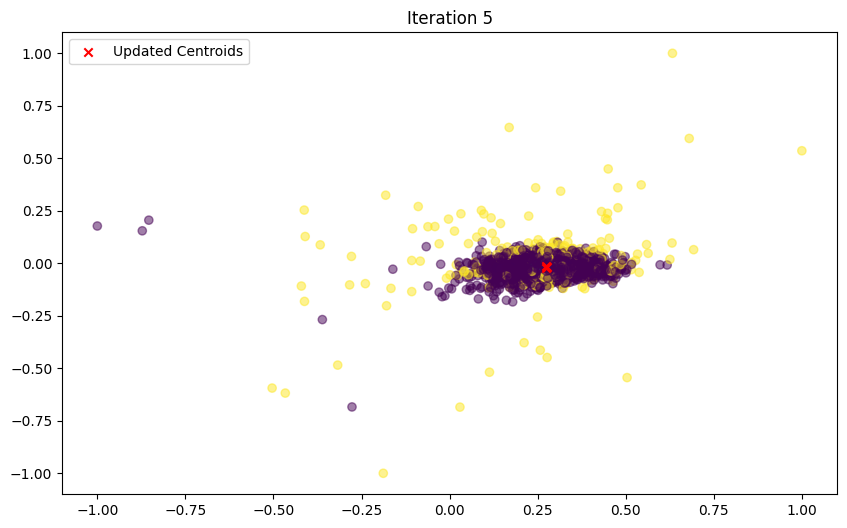

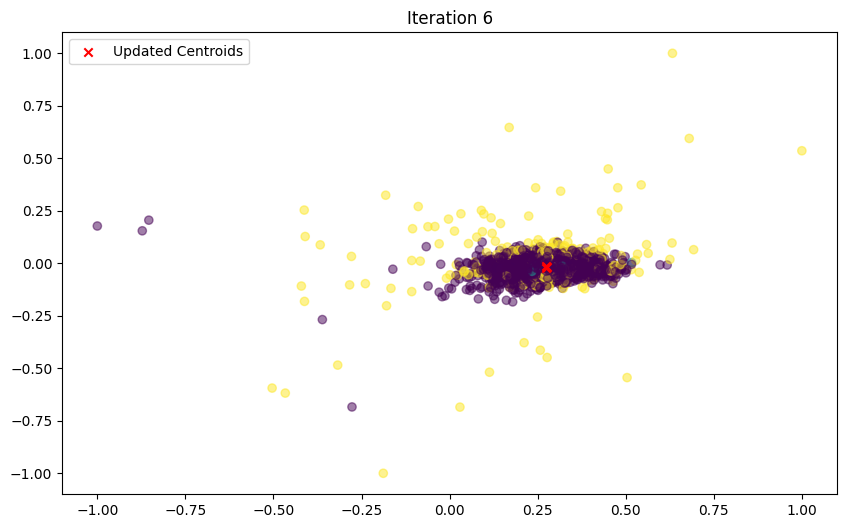

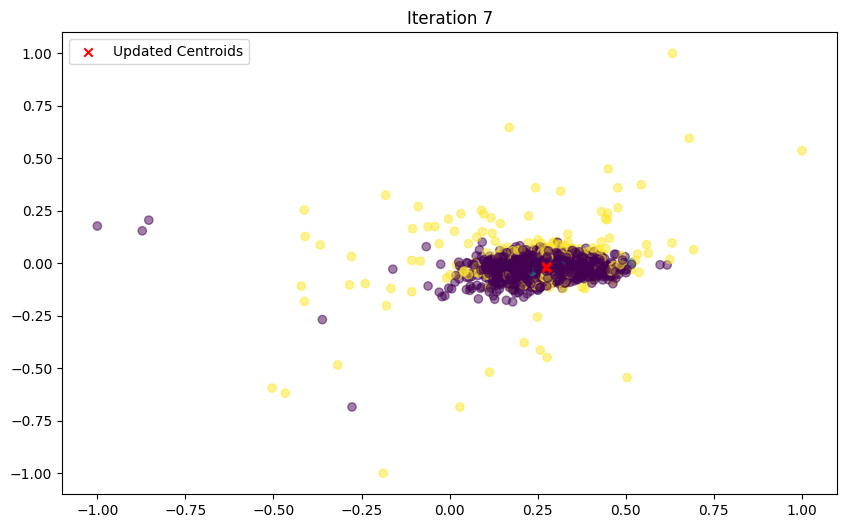

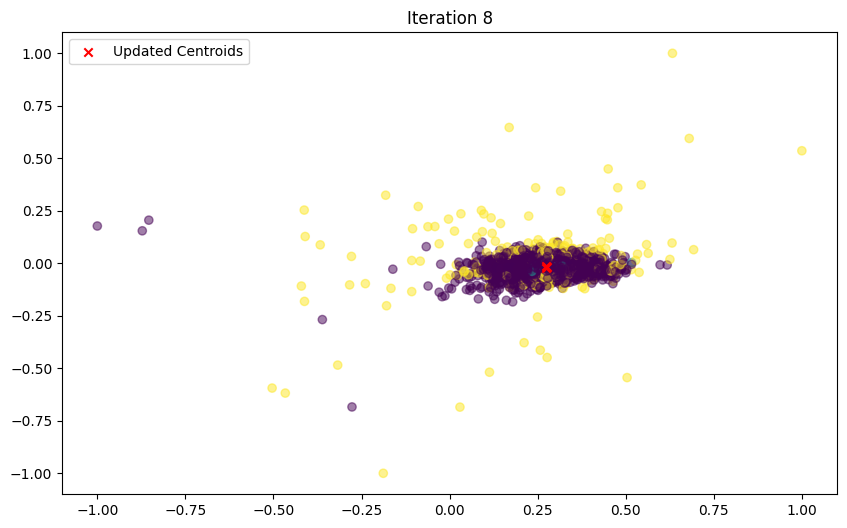

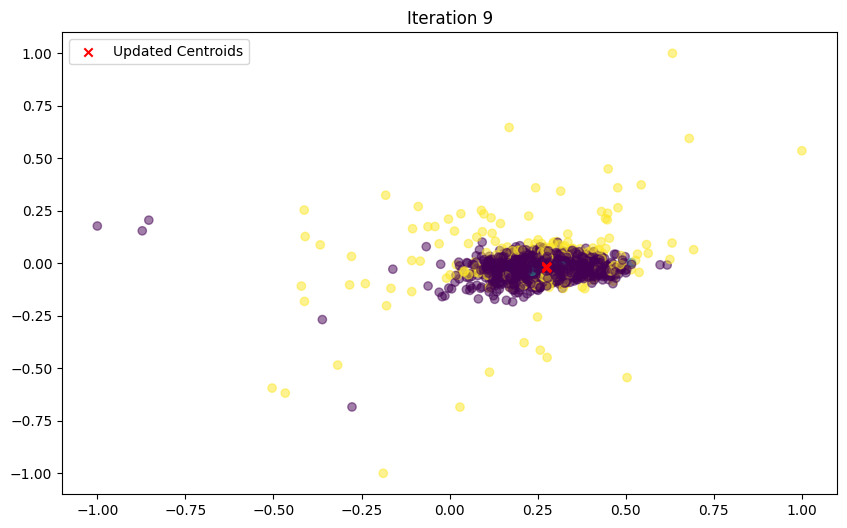

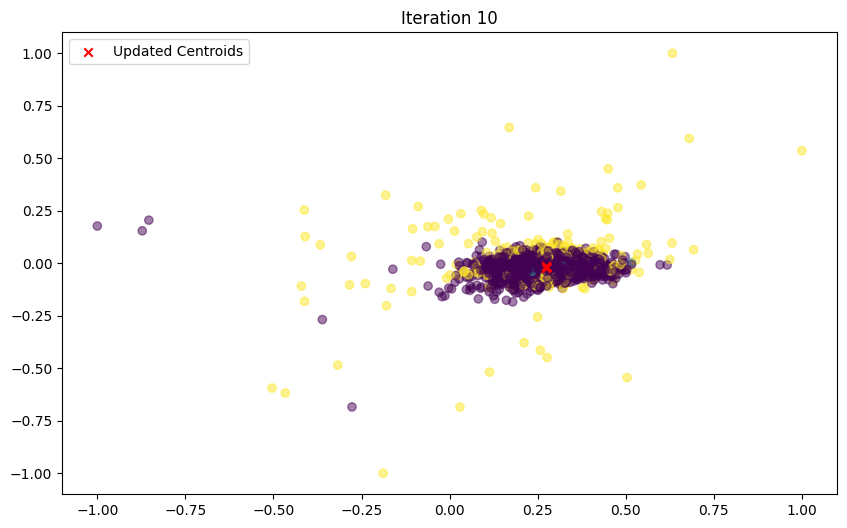

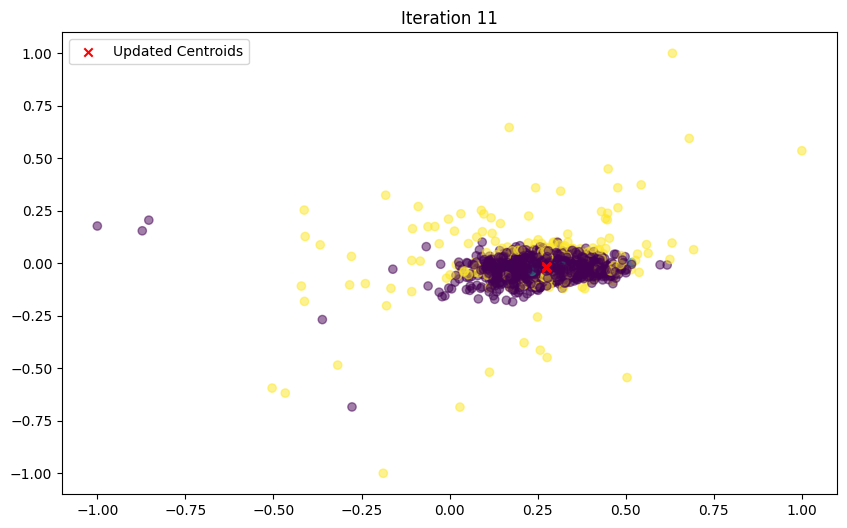

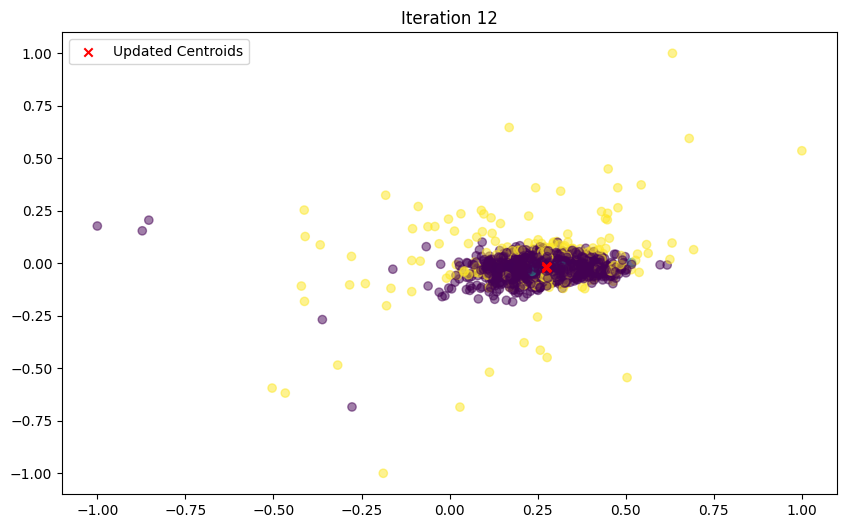

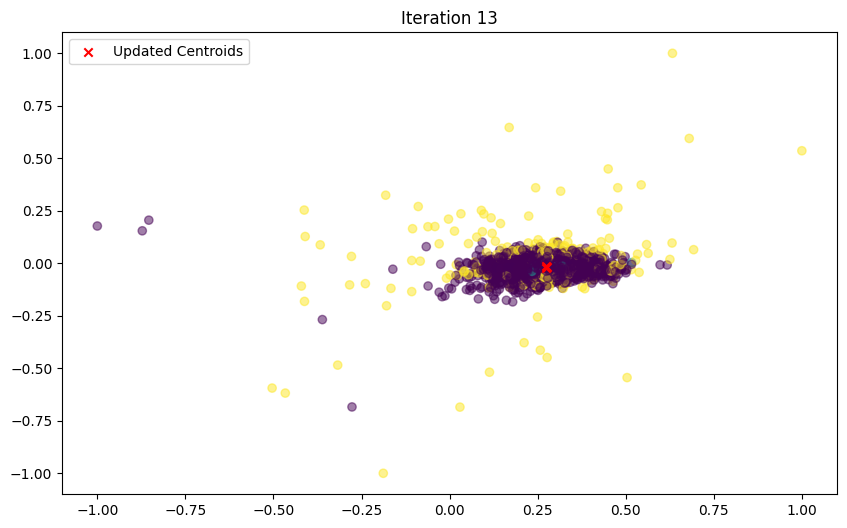

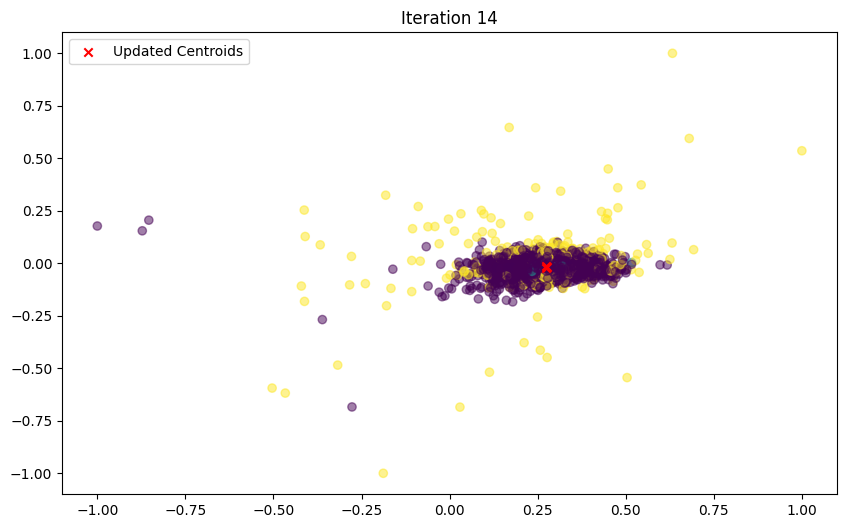

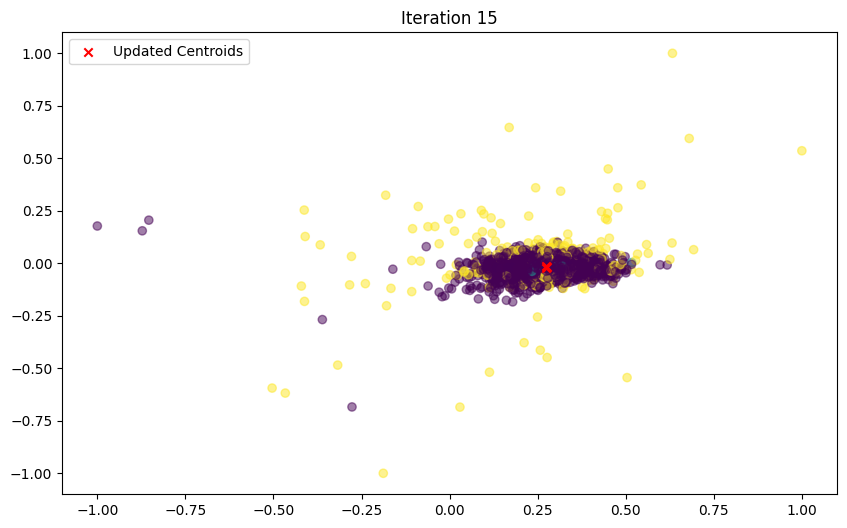

Accuracy: 0.16675734494015235


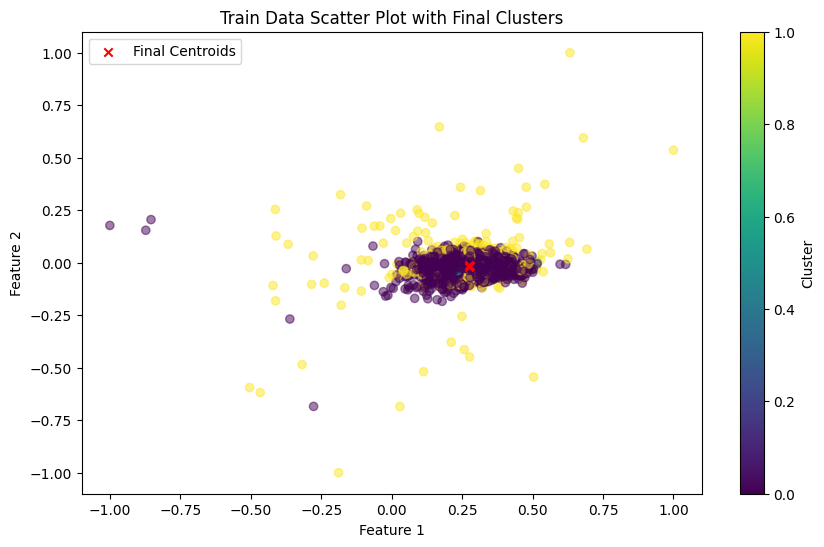

In [8]:
# Load train and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.drop(columns=['subject'], inplace=True)
test_data.drop(columns=['subject'], inplace=True)

# Convert class labels to numerical values
class_mapping = {'WALKING': 0, 'WALKING_UPSTAIRS': 1, 'WALKING_DOWNSTAIRS': 2, 'SITTING': 3, 'STANDING': 4, 'LAYING': 5}
train_data['Activity'] = train_data['Activity'].map(class_mapping)
test_data['Activity'] = test_data['Activity'].map(class_mapping)

# Extract features and labels
X_train = train_data.drop(columns=['Activity']).values
y_train = train_data['Activity'].values
X_test = test_data.drop(columns=['Activity']).values
y_test = test_data['Activity'].values

# Perform k-means clustering with intermediate plots
k = 3
max_iters = 15
clusters, centroids = k_means(X_train, k, max_iters, plot_steps=True)

# Map cluster labels to class labels
cluster_mapping = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
y_pred = np.array([cluster_mapping[int(cluster)] for cluster in clusters])

# Calculate accuracy
accuracy = calculate_accuracy(y_train, y_pred)
print(f'Accuracy: {accuracy}')

# Scatter plot for train data with final clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', label='Final Centroids')
plt.title('Train Data Scatter Plot with Final Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()
